In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

ตรี_all = pd.read_csv("ตรี_All.csv")
data_2563 = pd.read_csv("2563.csv")
data_2564 = pd.read_csv("2564.csv")
data_2565 = pd.read_csv("2565.csv")
data_2566 = pd.read_csv("2566.csv")

list_data = [data_2563, data_2564, data_2565, data_2566, ตรี_all]

dict_for_change = {"สาขาวิชา": "Major",	"ชาย": "Male", "หญิง": "Female", "ไม่ระบุเพศ" : "Unknow_Gender", "แรงงานไทย": "Thai", "แรงงานต่างด้าว": "Non_Thai", "แรงงานที่ต้องการรวม": "Total_Work_Demand"}

letter_box = ["-", "(", ")", "[", "]"]
for c in list_data:
    for n in range(len(dict_for_change)):
        c.columns = c.columns.str.replace(list(dict_for_change.keys())[n],list(dict_for_change.values())[n]) 
    for i in range(len(c.Major)):
        for letter in letter_box:
            c.Major[i] = c.Major[i].replace(letter, " ")



C:\Users\User\AppData\Local\Temp\ipykernel_11744\1496440535.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c.Major[i] = c.Major[i].replace(letter, " ")
C:\Users\User\AppData\Local\Temp\ipykernel_11744\1496440535.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c.Major[i] = c.Major[i].replace(letter, " ")
C:\Users\User\AppData\Local\Temp\ipykernel_11744\1496440535.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c.Major[i]

In [2]:
# import os

# folder_path = '/path/to/folder'
# for file_name in os.listdir(folder_path):
#     if file_name.endswith('.txt'):
#         file_path = os.path.join(folder_path, file_name)
#         with open(file_path, 'r') as file:
#             # do something with the file
#             print(file.read())

In [3]:
all_name = []
not_want_word = ["ปวส", "ปวช", "ป.โท", "ช่าง", "สำนักงานใหญ๋", "วิชาชีพ", "ผู้ควบคุม", "ทั่วไป", "อาชีว", "ก่อสร้าง", "เชื่อมโลหะ", "เทคนิค", "แม่พิมพ์โลหะ", "ที่เกี่ยวข้อง", "ฝ่ายผลิต", "การผลิต", "ความปลอดภัย", "ช่่างยนต์", "สำนักงานใหญ่"]
for c in list_data:
    for i in range(len(c)):
        match_not_wanted = re.search("|".join(not_want_word), c.Major[i])
        if match_not_wanted is not None:
            c.Major = c.Major.drop(i)
        else:
            all_name.append(c.Major[i])

clean_data_2563 = data_2563.dropna().reset_index(drop= True)
clean_data_2564 = data_2564.dropna().reset_index(drop= True)
clean_data_2565 = data_2565.dropna().reset_index(drop= True)
clean_data_2566 = data_2566.dropna().reset_index(drop= True)
clean_ตรี_all = ตรี_all.dropna().reset_index(drop= True)

clean_list_data = [clean_data_2563, clean_data_2564, clean_data_2565, clean_data_2566, clean_ตรี_all]

In [4]:
need_all = ["ทุกสาขา", "ไม่จำกัด", "ไม่กำหนด", "ไม่เน้น", "ปริญญาตรี", "สาขาใดก็ได้"]
บริหาร = ["yp=u","Finance" , "บันชี", "ตลาด", "การเงิน", "บัญชี", "บริหาร", "โลจิสติกส์", "การขาย", "ทรัพยากรมนุษย์", "เศรษฐศาสตร์", "การจัดการ", "logistic", "business", "accounting", "commerce", "พาณิช", "งานบุคคล", "การบันชี", "ธุรการ",]
วิศวกรรม = ["วิศว", "engineer", "ไฟฟ้า", "เครื่องกล", "อุตสาหกรรม", "electrical", "อีเล็กทรอนิค", "อิเล็กทรอนิกส์","อิเล็กทรอนิค","อีเล็คทรอนิก", "ยานยนต์", "วิสว", "ไฟฟา", "อุตสาหการ", "โยธา", "rubber", "เครื่องจักร"]
วิทยาศาสตร์ = ["โพลิเมอร์", "วิทยาศาสตร์", "เทคโนโลยีอาหาร", "สาธาณะสุข", "วิทยาศาสรต์", "อาหารและโภชนาการ", "สังคมสิ่งแวดล้อม", "เกษตร", "เกษคร", "ประมง", "คณิตศาสตร์", "การประกันภัย", "เทคโนโลยีการบรรจุ", "data science", "เกษตรกรรม", "คหกรรมศาสตร์"]
เทคโนโลยีสารสนเทศ = ["computer", "it", "คอมพิวเตอร์", "สาร์นสนเทศน์", "programmer", "คอมฟิวเตอร์", "เทคโนโลยีสารสนเทศ"]
แพทย์ศาสตร์ = ["เฉพาะทางด้านไตเทียม", "เภสัช", "แพทย์", "พยาบาล", "การดูแลเด็กและผู้สูงอายุ", "สัตวแพทย์", "สัตวแพทย", "รังสีเทคนิค", "ทันตแพทย", "กายภาพบำบัด", "สาธารณสุข", "สัตวศาสตร์"]
ครุศาสตร์ = ["มัธยมศึกษา", "ประถมศึกษา", "พัฒนาหลักสูตร", "ครุศาสตร์", "การสอน", "การศึกษา", "วิจัย", "การศึกษานอกระบบ", "เลขานุการ", "สื่อสารการศึกษา", "ศึกษาศาสตร์", "ปฐมวัย"]
ศิลปศาสตร์ = ["ศิลปกรรม", "กราฟฟิกส์ดีไซด์", "ออกแบบ", "ศิลป", "กราฟฟิคดีไซน์", "design"]
สถาปัตยกรรมศาสตร์ = ["สถาปัต", "เขียนแบบ"]
อักษรศาสตร์ = ["ญี่ปุ่น", "ภาษาอังกฤษ", "การสื่อสาร", "ภาษาต่างประเทศ", "อักษรศาสตร์"]
มนุษยศาสตร์ = ["มนุษยศาสตร์", "มานุษยวิทยา", "มานุษยสงเคราะห์"]
นิติศาสตร์ = ["นิติ", "เลขานุการ", "กฎหมาย", "รัฐศาสตร์", "laws"]
คณะนิเทศศาสตร์ = ["ประชาสัมพันธ์", "นิเทศ", "สื่อสารมวลชน"]
ดุริยางคศาสตร์ = ["ดุริยาง", "ดนตรี"]
การบริการและการท่องเที่ยว = ["การโรงแรม", "การบริการ", "สาขาท่องเที่ยว"]

In [5]:
need_attention = []

for k in clean_list_data:
    for num in range(len(k.Major)):
        match_need_all = re.search("|".join(need_all), k.Major[num].lower())
        match_บริหาร = re.search("|".join(บริหาร), k.Major[num].lower())
        match_วิศวกรรม = re.search("|".join(วิศวกรรม), k.Major[num].lower())
        match_วิทยาศาสตร์ = re.search("|".join(วิทยาศาสตร์), k.Major[num].lower())
        match_เทคโนโลยีสารสนเทศ = re.search("|".join(เทคโนโลยีสารสนเทศ), k.Major[num].lower())
        match_แพทย์ศาสตร์ = re.search("|".join(แพทย์ศาสตร์), k.Major[num].lower())
        match_ครุศาสตร์ = re.search("|".join(ครุศาสตร์), k.Major[num].lower())
        match_ศิลปศาสตร์ = re.search("|".join(ศิลปศาสตร์), k.Major[num].lower())
        match_สถาปัตยกรรมศาสตร์ = re.search("|".join(สถาปัตยกรรมศาสตร์), k.Major[num].lower())
        match_อักษรศาสตร์ = re.search("|".join(อักษรศาสตร์), k.Major[num].lower())
        match_มนุษยศาสตร์ = re.search("|".join(มนุษยศาสตร์), k.Major[num].lower())
        match_นิติศาสตร์ = re.search("|".join(นิติศาสตร์), k.Major[num].lower())
        match_คณะนิเทศศาสตร์ = re.search("|".join(คณะนิเทศศาสตร์), k.Major[num].lower())
        match_ดุริยางคศาสตร์ = re.search("|".join(ดุริยางคศาสตร์), k.Major[num].lower())
        match_การบริการและการท่องเที่ยว = re.search("|".join(การบริการและการท่องเที่ยว), k.Major[num].lower())
        if match_need_all is not None:
            k.loc[k['Major'].str.contains(k.Major[num]), 'Major'] = 'Any Major'
        elif match_บริหาร is not None:
            k.loc[k['Major'].str.contains(k.Major[num]), 'Major'] = 'Management'
        elif match_วิทยาศาสตร์ is not None:
            k.loc[k['Major'].str.contains(k.Major[num]), 'Major'] = 'Science'
        elif match_วิศวกรรม is not None:
            k.loc[k['Major'].str.contains(k.Major[num]), 'Major'] = 'Engineering'
        elif match_เทคโนโลยีสารสนเทศ is not None:
            k.loc[k['Major'].str.contains(k.Major[num]), 'Major'] = 'Computer'
        elif match_แพทย์ศาสตร์ is not None:
            k.loc[k['Major'].str.contains(k.Major[num]), 'Major'] = 'Medicine'
        elif match_ครุศาสตร์ is not None:
            k.loc[k['Major'].str.contains(k.Major[num]), 'Major'] = 'Education'
        elif match_ศิลปศาสตร์ is not None:
            k.loc[k['Major'].str.contains(k.Major[num]), 'Major'] = 'Art'
        elif match_สถาปัตยกรรมศาสตร์ is not None:
            k.loc[k['Major'].str.contains(k.Major[num]), 'Major'] = 'Architecture'
        elif match_อักษรศาสตร์ is not None:
            k.loc[k['Major'].str.contains(k.Major[num]), 'Major'] = 'Literature'
        elif match_มนุษยศาสตร์ is not None:
            k.loc[k['Major'].str.contains(k.Major[num]), 'Major'] = 'Humanities'
        elif match_นิติศาสตร์ is not None:
            k.loc[k['Major'].str.contains(k.Major[num]), 'Major'] = 'Law'
        elif match_คณะนิเทศศาสตร์ is not None:
            k.loc[k['Major'].str.contains(k.Major[num]), 'Major'] = 'Communication Arts'
        elif match_ดุริยางคศาสตร์ is not None:
            k.loc[k['Major'].str.contains(k.Major[num]), 'Major'] = 'Music'
        elif match_การบริการและการท่องเที่ยว is not None:
            k.loc[k['Major'].str.contains(k.Major[num]), 'Major'] = 'Tourism and Hospitality'
        else: need_attention.append(k.Major[num])

need_attention


['Management',
 'Management',
 'Management',
 'Management',
 'Management',
 'Any Major',
 'Management',
 'Management',
 'Management',
 'Management',
 'Any Major',
 'Science',
 'Any Major',
 'Any Major',
 'Science',
 'Management',
 'Science',
 'Management',
 'Management',
 'Management',
 'Management',
 'Management',
 'Any Major',
 'Management',
 'Management',
 'Management',
 'Science',
 'Management',
 'Management',
 'Any Major',
 'Management',
 'Management',
 'Science',
 'Management',
 'Management',
 'Management',
 'Any Major',
 'Any Major',
 'Any Major',
 'Management',
 'Management',
 'Management',
 'Management',
 'Management',
 'Management',
 'Management',
 'Education',
 'Management',
 'Science',
 'Management',
 'Science',
 'Management',
 'Management',
 'Management',
 'Management',
 'Management',
 'Science',
 'Science',
 'Management',
 'Management',
 'Management',
 'Management',
 'Any Major',
 'Any Major',
 'Management',
 'Management',
 'Management',
 'Management',
 'Management',
 'Ma

In [6]:
aggregation_functions = {'Male': 'sum', 'Female': 'sum', 'Unknow_Gender': 'sum', 'Thai': 'sum', 'Non_Thai': 'sum', 'Total_Work_Demand': 'sum'}
new_data_2563 = clean_data_2563.groupby(clean_data_2563.Major).aggregate(aggregation_functions)
new_data_2564 = clean_data_2564.groupby(clean_data_2564.Major).aggregate(aggregation_functions)
new_data_2565 = clean_data_2565.groupby(clean_data_2565.Major).aggregate(aggregation_functions)
new_data_2566 = clean_data_2566.groupby(clean_data_2566.Major).aggregate(aggregation_functions)
new_ตรี_all = clean_ตรี_all.groupby(clean_ตรี_all.Major).aggregate(aggregation_functions)

In [7]:
new_data_2563.sort_values("Thai", inplace=True, ascending=False)
new_data_2563.reset_index(inplace=True)

new_data_2564.sort_values("Thai", inplace=True, ascending=False)
new_data_2564.reset_index(inplace=True)

new_data_2565.sort_values("Thai", inplace=True, ascending=False)
new_data_2565.reset_index(inplace=True)

new_data_2566.sort_values("Thai", inplace=True, ascending=False)
new_data_2566.reset_index(inplace=True)

new_ตรี_all.sort_values("Thai", inplace=True, ascending=False)
new_ตรี_all.reset_index(inplace=True)

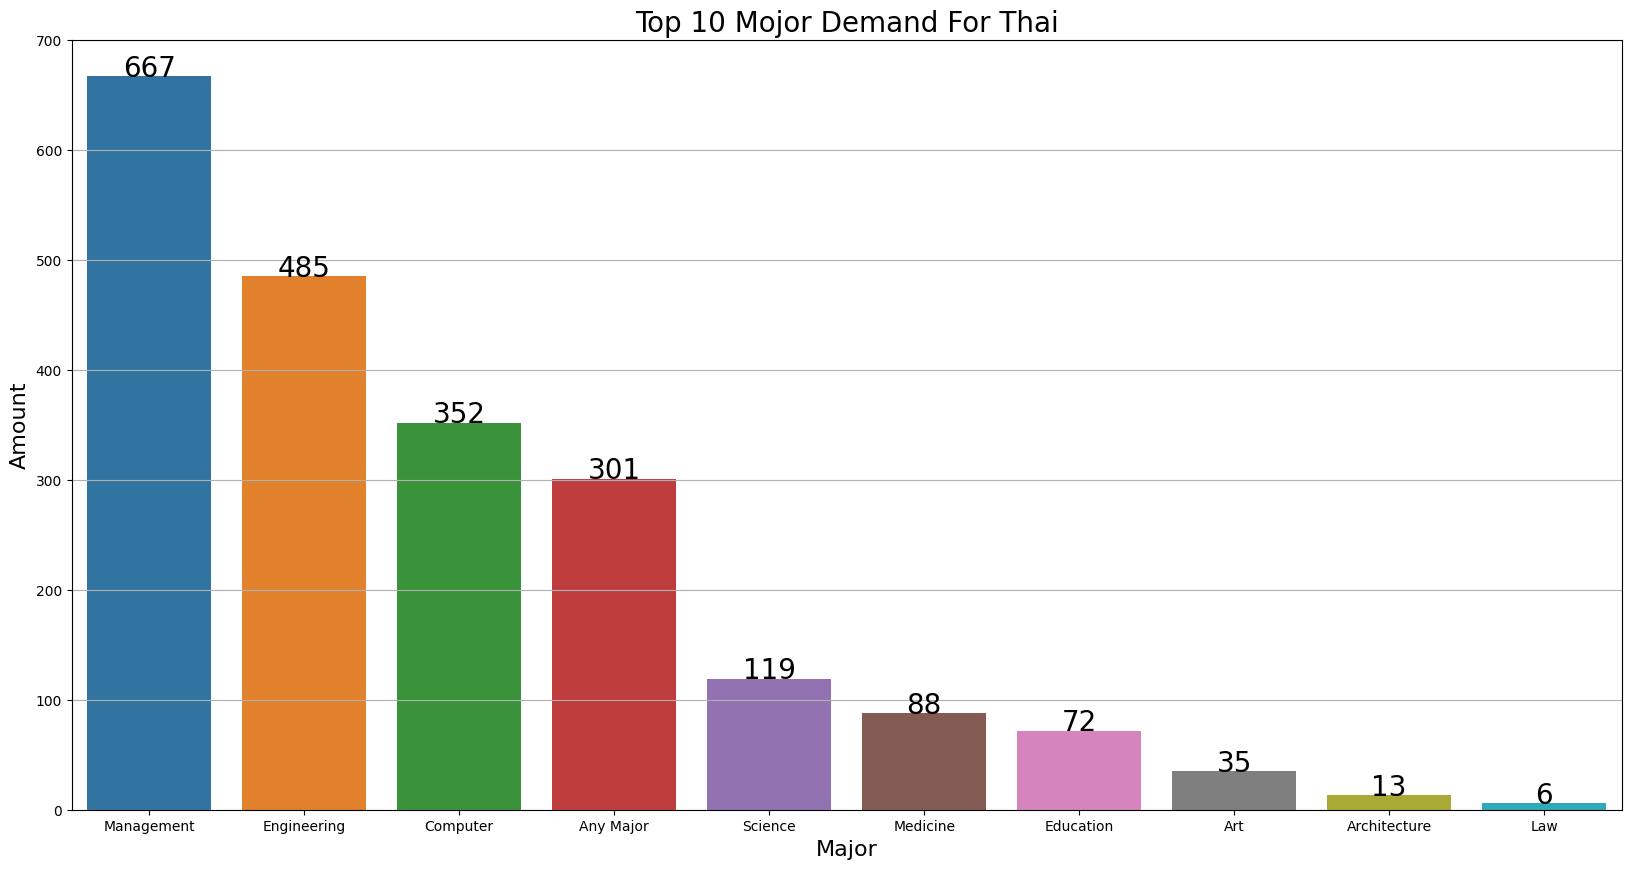

In [8]:
# prop = fm.FontProperties(fname='C:/Users/USER/AppData/Local/Microsoft/Windows/Fonts/angsau.ttf')
# plt.rcParams['font.family'] = prop.get_name()

# df = ตรี_all.sort_values(by='แรงงานที่ต้องการรวม', ascending=False)
new_ตรี_all_10 = new_ตรี_all.head(10)

plt.figure(figsize=(20, 10))
sns.barplot(x='Major', y='Thai', data=new_ตรี_all_10)
for index, value in enumerate(new_ตรี_all_10['Thai']):
    plt.text(index, value, str(value), fontsize=20, ha='center')

plt.title("Top 10 Mojor Demand For Thai", fontsize=20)
plt.xlabel("Major", fontsize=16)
plt.ylabel("Amount", fontsize=16)

plt.grid(visible=True, axis='y')

plt.show()

In [9]:
prop = fm.FontProperties(fname='C:/Users/USER/AppData/Local/Microsoft/Windows/Fonts/angsau.ttf')
plt.rcParams['font.family'] = prop.get_name()

df = new_ตรี_all

# df.set_index("สาขาวิชา", inplace=True)

df = df.sort_values(by='แรงงานที่ต้องการรวม', ascending=False)
df = df.head(5)

index = np.arange(len(df.index))
bar_width = 0.35

fig, ax = plt.subplots()
male = ax.bar(index, df["ชาย"], bar_width, label="ชาย")
female = ax.bar(index + bar_width, df["หญิง"], bar_width, label="หญิง")

for i, v in enumerate(male):
    ax.text(i, v.get_height()+0.5, str(v.get_height()), fontsize = 16, ha='center')
for i, v in enumerate(female):
    ax.text(i  + bar_width, v.get_height()+0.5, str(v.get_height()), fontsize = 16, ha='center')

plt.title("แรงงานไทยของสาขาวิชาต่างๆ", fontsize=20)
plt.xticks(index + bar_width/2, df.สาขาวิชา, fontsize=16, rotation=45)
plt.xlabel("สาขาวิชา", fontsize=16)
plt.ylabel("จำนวนคน", fontsize=16)

plt.figure(figsize=(10, 5))


plt.yticks(fontsize=16)
plt.show()


KeyError: 'แรงงานที่ต้องการรวม'

In [ ]:
# all_name = []
# not_want_word = ["ปวส", "ปวช", "ป.โท", "ช่าง", "สำนักงานใหญ๋", "วิชาชีพ", "ผู้ควบคุม", "ทั่วไป", "อาชีว", "ก่อสร้าง", "เชื่อมโลหะ", "เทคนิค", "แม่พิมพ์โลหะ", "ที่เกี่ยวข้อง", "ฝ่ายผลิต", "การผลิต", "ความปลอดภัย", "ช่่างยนต์", "สำนักงานใหญ่"]
# for c in list_data:
#     for i in range(len(c)):
#         match_not_wanted = re.search("|".join(not_want_word), c.สาขาวิชา[i])
#         if match_not_wanted is None:
#                 all_name.append(c.สาขาวิชา[i].lower())

# all_name

# need_all = ["ทุกสาขา", "ไม่จำกัด", "ไม่กำหนด", "ไม่เน้น", "ปริญญาตรี", "สาขาใดก็ได้"]
# บริหาร = ["yp=u", "บันชี", "ตลาด", "การเงิน", "บัญชี", "บริหาร", "โลจิสติกส์", "การขาย", "ทรัพยากรมนุษย์", "เศรษฐศาสตร์", "การจัดการ", "logistic", "business", "accounting", "commerce", "พาณิช", "งานบุคคล", "การบันชี", "ธุรการ",]
# วิศวกรรม = ["วิศว", "engineer", "ไฟฟ้า", "เครื่องกล", "อุตสาหกรรม", "electrical", "อีเล็กทรอนิค", "อิเล็กทรอนิกส์","อิเล็กทรอนิค","อีเล็คทรอนิก", "ยานยนต์", "วิสว", "ไฟฟา", "อุตสาหการ", "โยธา", "rubber", "เครื่องจักร"]
# วิทยาศาสตร์ = ["โพลิเมอร์", "วิทยาศาสตร์", "เทคโนโลยีอาหาร", "สาธาณะสุข", "วิทยาศาสรต์", "อาหารและโภชนาการ", "สังคมสิ่งแวดล้อม", "เกษตร", "เกษคร", "ประมง", "คณิตศาสตร์", "การประกันภัย", "เทคโนโลยีการบรรจุ", "data science", "เกษตรกรรม", "คหกรรมศาสตร์"]
# เทคโนโลยีสารสนเทศ = ["computer", "it", "คอมพิวเตอร์", "สาร์นสนเทศน์", "programmer", "คอมฟิวเตอร์", "เทคโนโลยีสารสนเทศ"]
# แพทย์ศาสตร์ = ["เฉพาะทางด้านไตเทียม", "เภสัช", "แพทย์", "พยาบาล", "การดูแลเด็กและผู้สูงอายุ", "สัตวแพทย์", "สัตวแพทย", "รังสีเทคนิค", "ทันตแพทย", "กายภาพบำบัด", "สาธารณสุข", "สัตวศาสตร์"]
# ครุศาสตร์ = ["มัธยมศึกษา", "ประถมศึกษา", "พัฒนาหลักสูตร", "ครุศาสตร์", "การสอน", "การศึกษา", "วิจัย", "การศึกษานอกระบบ", "เลขานุการ", "สื่อสารการศึกษา", "ศึกษาศาสตร์", "ปฐมวัย"]
# ศิลปศาสตร์ = ["ศิลปกรรม", "กราฟฟิกส์ดีไซด์", "ออกแบบ", "ศิลป", "กราฟฟิคดีไซน์", "design"]
# สถาปัตยกรรมศาสตร์ = ["สถาปัต", "เขียนแบบ"]
# อักษรศาสตร์ = ["ญี่ปุ่น", "ภาษาอังกฤษ", "การสื่อสาร", "ภาษาต่างประเทศ"]
# มนุษยศาสตร์ = ["มนุษยศาสตร์", "มานุษยวิทยา", "มานุษยสงเคราะห์"]
# นิติศาสตร์ = ["นิติ", "เลขานุการ", "กฎหมาย", "รัฐศาสตร์", "laws"]
# คณะนิเทศศาสตร์ = ["ประชาสัมพันธ์", "นิเทศ", "สื่อสารมวลชน"]
# ดุริยางคศาสตร์ = ["ดุริยาง", "ดนตรี"]
# การบริการและการท่องเที่ยว = ["การโรงแรม", "การบริการ", "สาขาท่องเที่ยว"]

# need_attention = []

# for name in all_name:
#     match_need_all = re.search("|".join(need_all), name)
#     match_บริหาร = re.search("|".join(บริหาร), name)
#     match_วิศวกรรม = re.search("|".join(วิศวกรรม), name)
#     match_วิทยาศาสตร์ = re.search("|".join(วิทยาศาสตร์), name)
#     match_เทคโนโลยีสารสนเทศ = re.search("|".join(เทคโนโลยีสารสนเทศ), name)
#     match_แพทย์ศาสตร์ = re.search("|".join(แพทย์ศาสตร์), name)
#     match_ครุศาสตร์ = re.search("|".join(ครุศาสตร์), name)
#     match_ศิลปศาสตร์ = re.search("|".join(ศิลปศาสตร์), name)
#     match_สถาปัตยกรรมศาสตร์ = re.search("|".join(สถาปัตยกรรมศาสตร์), name)
#     match_อักษรศาสตร์ = re.search("|".join(อักษรศาสตร์), name)
#     match_มนุษยศาสตร์ = re.search("|".join(มนุษยศาสตร์), name)
#     match_นิติศาสตร์ = re.search("|".join(นิติศาสตร์), name)
#     match_คณะนิเทศศาสตร์ = re.search("|".join(คณะนิเทศศาสตร์), name)
#     match_ดุริยางคศาสตร์ = re.search("|".join(ดุริยางคศาสตร์), name)
#     match_การบริการและการท่องเที่ยว = re.search("|".join(การบริการและการท่องเที่ยว), name)
#     if match_need_all is not None:
#         pass
#     elif match_บริหาร is not None:
#         pass
#     elif match_วิทยาศาสตร์ is not None:
#         pass
#     elif match_วิศวกรรม is not None:
#         pass
#     elif match_เทคโนโลยีสารสนเทศ is not None:
#         pass
#     elif match_แพทย์ศาสตร์ is not None:
#         pass
#     elif match_ครุศาสตร์ is not None:
#         pass
#     elif match_ศิลปศาสตร์ is not None:
#         pass
#     elif match_สถาปัตยกรรมศาสตร์ is not None:
#         pass
#     elif match_อักษรศาสตร์ is not None:
#         pass
#     elif match_มนุษยศาสตร์ is not None:
#         pass
#     elif match_นิติศาสตร์ is not None:
#         pass
#     elif match_คณะนิเทศศาสตร์ is not None:
#         pass
#     elif match_ดุริยางคศาสตร์ is not None:
#         pass
#     elif match_การบริการและการท่องเที่ยว is not None:
#         pass
#     else: need_attention.append(name)

# need_attention